# Bài tập SVM



## Sử dụng SVC để phân nhóm cho tập Iris dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Iris.csv')

## Phân tích dữ liệu

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
data.shape

(150, 6)

In [ ]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data[data['Species'] == 'Iris-setosa'].shape

(50, 6)

In [ ]:
data[data['Species'] == 'Iris-versicolor'].shape

(50, 6)

In [ ]:
data[data['Species'] == 'Iris-virginica'].shape

(50, 6)

In [ ]:
print("Total number of Species: {}".format(data.shape[0]))
print("Number of Iris-setosa: {}".format(data[data.Species == 'Iris-setosa'].shape[0]))
print("Number of Iris-versicolor: {}".format(data[data.Species == 'Iris-versicolor'].shape[0]))
print("Number of Iris-virginica: {}".format(data[data.Species == 'Iris-virginica'].shape[0]))

Total number of Species: 150
Number of Iris-setosa: 50
Number of Iris-versicolor: 50
Number of Iris-virginica: 50


## Biến đổi dữ liệu

### Xác định `features` và `labels`

In [ ]:
X = data.iloc[:, :-1]
X.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


In [ ]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,-1]

# Encode label category
# Iris-setosa: 0
# Iris-versicolor: 1
# Iris-virginica: 2

label_encoder = LabelEncoder()

In [ ]:
y.head(10)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [ ]:
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Chuẩn hóa dữ liệu

In [ ]:
X.shape

(150, 5)

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Splitting dataset into training set and testing set for better generalisation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Sử dụng mô hình Support Vector Machine
- Chúng ta sẽ sử dụng Support Vector Classifier(SVC) của thư viện `sklearn` với các `kernel` khác nhau

#### Default kernel (=> kernel = 'rbf')

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters

In [ ]:
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- ==> kernel = 'rbf' is the default

In [ ]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


#### Linear kernel

In [ ]:
svc=SVC(kernel='linear')

In [ ]:
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


#### Polynomial kernel

In [ ]:
svc=SVC(kernel='poly')

In [ ]:
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


### K-fold cross validation with different kernels

#### a) CV on rbf kernel

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print(scores.mean())

1.0


##### Thay đổi giá trị `gamma`
- gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. - When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad.
- When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.96, 0.96, 0.9866666666666667, 1.0, 0.9866666666666667, 0.8466666666666667, 0.35333333333333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

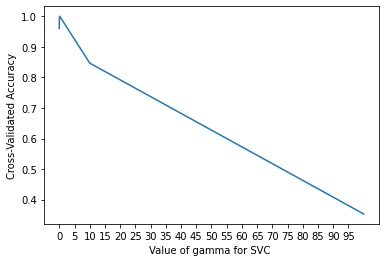

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

- ==> Ta thấy `gamma = 1` trở lên độ chính xác gảim, do đó ta sẽ tìm `gamma` cho độ chính xác cao nhất trong khoảng (0, 0.1)

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.96, 0.96, 0.9866666666666667, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

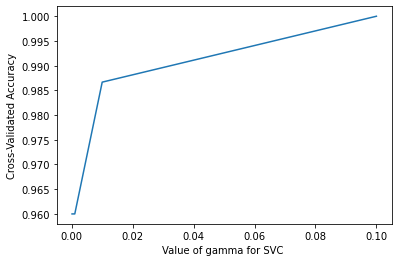

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- The score increases steadily and raches its peak at 0.01 Thus Gamma should be 0.01.

##### Xây dựng mô hình với `gamma = 0.01`

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf', gamma = 0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.93333333 0.93333333 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [ ]:
print(scores.mean())

0.9866666666666667


#### b) CV on Linear kernel

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print(scores.mean())

1.0


##### Thay đổi giá trị C
- C is a parameter of the SVC learner and is the penalty for misclassifying a data point.
- When C is small, the classifier is okay with misclassified data points (high bias, low variance) => cause underfitting . 
- When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance) => cause overfitting .

- ==> Thus the value of C must be chosen in such a manner that it generalised the unseen data well**


In [ ]:
C_range=list(range(1,26))
acc_score=[]
print(C_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [ ]:
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

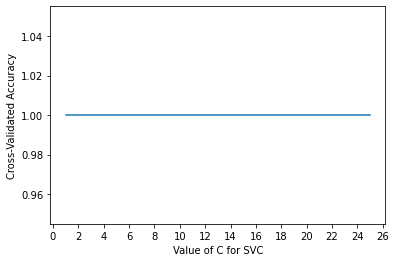

In [ ]:
import matplotlib.pyplot as plt

C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

- ==> Từ biểu đồ trên ta thấy độ chính xác đều 100% cho mọi C, nên ta có thể chọn bất cứ giá trị C nào

#### c) CV on Polynomial kernel

In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.93333333 0.93333333 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [ ]:
print(scores.mean())

0.9866666666666667


##### Taking polynomial kernel with different degree

In [ ]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.8666666666666666, 0.9866666666666667, 0.86, 0.9400000000000001, 0.8400000000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

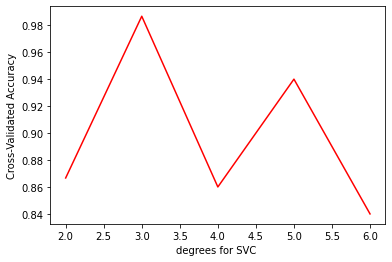

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- => Nhận xét: độ chính xác cao tại degree = 3, sau đó giảm dần. Do đó ta có thể thấy khi `degree` tăng, mô hình càng phức tạp, càng dễ dẫn đến hiện tượng overfitting

### Sử dụng "RandomizedSearchCV"
- Tất cả các bước trên có thể đơn giản hóa bằng cách dùng `GridSearchCV` hoặc `RandomizedSearchCV`

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


kernel_options = ['linear', 'poly', 'rbf']
C_options =  np.arange(1, 10, 0.001).tolist()
gamma_options =  np.arange(1, 10, 0.001).tolist()

param_grid = dict(kernel = kernel_options, C = C_options, gamma = gamma_options)

start_time = time.time()
clf = SVC()

#param_grid : grid của các thông số cần thay đổi
random = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, cv = 10, scoring = 'accuracy')
random

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1.0, 1.001,...
                                                  1.018999999999998,
                                                  1.0199999999999978,
                                                  1.0209999999999977,
                                                  1.0219999999999976,
                                                  1.0229999999999975,
                                                  1.0

In [ ]:
clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
start_time = time.time()
random_result = random.fit(X, y)
print("Best: %f using %s" % (random.best_score_, random.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 1.000000 using {'kernel': 'linear', 'gamma': 9.309999999999086, 'C': 3.7569999999996964}
Execution time: 0.22978973388671875 ms


In [ ]:
best_clf = random.best_estimator_

In [ ]:
random.best_params_

{'C': 3.7569999999996964, 'gamma': 9.309999999999086, 'kernel': 'linear'}

In [ ]:
random.best_score_

1.0

#### Sử dụng mô hình tốt nhất để dự đoán kết quả cuối cùng
- Độ chính xác này khác với `random.best_score_`

In [ ]:
best_clf.score(X_test, y_test)

1.0